#Mfundo Monchwe
## 201726904

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install RAPIDS

     |████████████████████████████████| 251 kB 5.3 MB/s 
     |████████████████████████████████| 246 kB 39.8 MB/s 
     |████████████████████████████████| 114 kB 45.2 MB/s 


successfully installed

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
import commands
print(commands.getoutput('nvidia-smi'))

ModuleNotFoundError: ignored

In [ ]:
!pip install gputil
!pip install psutil
!pip install humanize

  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=f72cca1b20b52d4f7a8e394f66c97f8c50f3187c9c10a53fe8437ac7809ccc50
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil


In [ ]:
# Import packages
import os,sys,humanize,psutil,GPUtil

# Define function
def mem_report():
  print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))
  
  GPUs = GPUtil.getGPUs()
  for i, gpu in enumerate(GPUs):
    print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))
    
# Execute function
mem_report()

CPU RAM Free: 12.7 GB
GPU 0 ... Mem Free: 11441MB / 11441MB | Utilization   0%


In [ ]:
!nvidia-smi

Mon Nov 22 09:04:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1B.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            On   | 00000000:00:1C.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv.zip to train.csv.zip
Saving test.csv to test.csv
Saving sample_submission.csv to sample_submission.csv


In [ ]:
from google.colab import files
uploaded_1 = files.upload()

Saving train.csv to train.csv


uploaded_1 = files.upload()

## Part b

In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 450)
warnings.filterwarnings('ignore')

In [ ]:
import cudf
import cupy as cp
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv', parse_dates=['date'])
test = pd.read_csv('test.csv', parse_dates=['date'])
dataframe = pd.concat([train, test], sort=False)

In [ ]:
dataframe.head()

,date,store,item,sales,id
0,2013-01-01,1,1,13.0,NaN
1,2013-01-02,1,1,11.0,NaN
2,2013-01-03,1,1,14.0,NaN
3,2013-01-04,1,1,13.0,NaN
4,2013-01-05,1,1,10.0,NaN


N

we have the missing values under ID
or we can NAa

In [ ]:
print("Train setinin boyutu:",train.shape)
print("Test setinin boyutu:",test.shape)

Train setinin boyutu: (913000, 4)
Test setinin boyutu: (45000, 4)


In [ ]:
dataframe.info

<bound method DataFrame.info of             date  store  item  sales       id
0     2013-01-01      1     1   13.0      NaN
1     2013-01-02      1     1   11.0      NaN
2     2013-01-03      1     1   14.0      NaN
3     2013-01-04      1     1   13.0      NaN
4     2013-01-05      1     1   10.0      NaN
...          ...    ...   ...    ...      ...
44995 2018-03-27     10    50    NaN  44995.0
44996 2018-03-28     10    50    NaN  44996.0
44997 2018-03-29     10    50    NaN  44997.0
44998 2018-03-30     10    50    NaN  44998.0
44999 2018-03-31     10    50    NaN  44999.0

[958000 rows x 5 columns]>

In [ ]:
dataframe.shape

(958000, 5)

In [ ]:
dataframe.quantile([0, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T

,0.00,0.05,0.25,0.50,0.75,0.95,0.99,1.00
store,1.0,1.00,3.00,5.5,8.00,10.00,10.00,10.0
item,1.0,3.00,13.00,25.5,38.00,48.00,50.00,50.0
sales,0.0,16.00,30.00,47.0,70.00,107.00,135.00,231.0
id,0.0,2249.95,11249.75,22499.5,33749.25,42749.05,44549.01,44999.0


## Part C

### i)

In [ ]:

dataframe['month'] = dataframe.date.dt.month

dataframe['day_of_month'] = dataframe.date.dt.day

dataframe['day_of_year'] = dataframe.date.dt.dayofyear 

dataframe['week_of_year'] = dataframe.date.dt.weekofyear

dataframe['day_of_week'] = dataframe.date.dt.dayofweek

dataframe['year'] = dataframe.date.dt.year

dataframe["is_wknd"] = dataframe.date.dt.weekday // 4

dataframe['is_month_start'] = dataframe.date.dt.is_month_start.astype(int)

dataframe['is_month_end'] = dataframe.date.dt.is_month_end.astype(int) 

ii


In [ ]:
dataframe.head(5).shift(30)

,store,item,sales,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

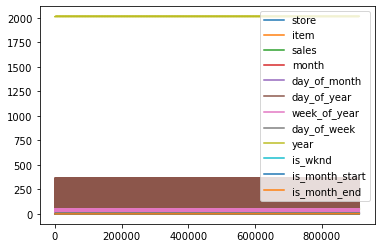

In [ ]:
dataframe.plot()

### iii

In [ ]:
(dataframe.isnull().sum() * 100 / dataframe.shape[0]).sort_values(ascending=False)# checking missing values

id                95.302714
sales              4.697286
is_month_end       0.000000
is_month_start     0.000000
is_wknd            0.000000
year               0.000000
day_of_week        0.000000
week_of_year       0.000000
day_of_year        0.000000
day_of_month       0.000000
month              0.000000
item               0.000000
store              0.000000
date               0.000000
dtype: float64

In [ ]:
dataframe = dataframe.drop(["id"], axis = 1)

In [ ]:
dataframe = dataframe.dropna()

In [ ]:
dataframe = dataframe.drop(['date'], axis = 1)

In [ ]:
dataframe.head(5)

,store,item,sales,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end
0,1,1,13.0,1,1,1,1,1,2013,0,1,0
1,1,1,11.0,1,2,2,1,2,2013,0,0,0
2,1,1,14.0,1,3,3,1,3,2013,0,0,0
3,1,1,13.0,1,4,4,1,4,2013,1,0,0
4,1,1,10.0,1,5,5,1,5,2013,1,0,0


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   store           913000 non-null  int64  
 1   item            913000 non-null  int64  
 2   sales           913000 non-null  float64
 3   month           913000 non-null  int64  
 4   day_of_month    913000 non-null  int64  
 5   day_of_year     913000 non-null  int64  
 6   week_of_year    913000 non-null  int64  
 7   day_of_week     913000 non-null  int64  
 8   year            913000 non-null  int64  
 9   is_wknd         913000 non-null  int64  
 10  is_month_start  913000 non-null  int64  
 11  is_month_end    913000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 90.6 MB


### Part d

In [ ]:
X = dataframe.drop(['sales'], axis = 1)
y = dataframe['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Part e

### i

In [ ]:
lr = LinearRegression()  

In [ ]:
%time lr.fit(X_train, y_train) 

CPU times: user 168 ms, sys: 284 ms, total: 452 ms
Wall time: 176 ms


LinearRegression()

# part f

In [ ]:
from cuml.linear_model import LinearRegression as cuLR

In [ ]:
%%time
cuml_reg_model = cuLR( fit_intercept = True,
                       normalize = True,
                       algorithm = 'eig' )

trained_LR = cuml_reg_model.fit( X_train, y_train )

## Part g


### i

In [ ]:
y_pred = lr.predict(X_test)

### ii

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 21.756177483553536


# part h

for both mod4sl we compare training time and forecastng performance